In [73]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as anim
#matplotlib.use('TkAgg')
import networkx as nx
import random as rd

n = 30 # number of nodes
k = 4 # number of neighbors of each node
states = []
fig = plt.figure()


def initialize():
    global g
    g = nx.grid_2d_graph(10, 10)
#     for i in range(n):
#         for j in range(1, k // 2 + 1):
#             g.add_edge(i, (i + j) % n)
#             g.add_edge(i, (i - j) % n)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    plt.cla()
    nx.draw(g, pos = g.pos)
    plt.show()

def update():
    global g
    g.count += 1
    if g.count % 20 == 0: # rewiring once in every 20 steps
        nds = list(g.nodes)
        i = rd.choice(nds)
        if g.degree[i] > 0:
            g.remove_edge(i, rd.choice(list(g.neighbors(i))))
            nds.remove(i)
            for j in g.neighbors(i):
                nds.remove(j)
            g.add_edge(i, rd.choice(nds))

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 100)
#     return nx.draw_networkx_nodes(g,g.pos)
#     plt.cla()
#     nx.draw(g, pos = g.pos)
#     plt.show()    
#     states.append(g)
    
    
    


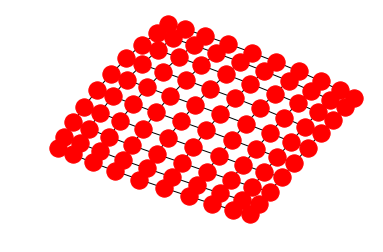

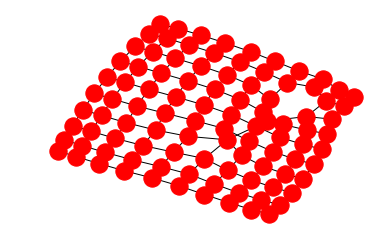

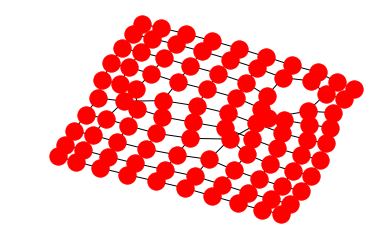

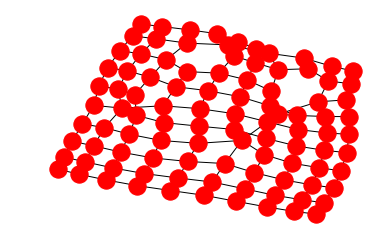

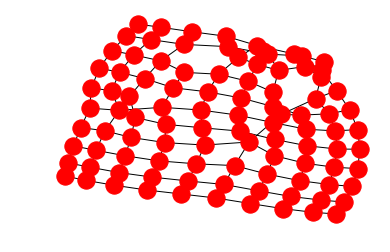

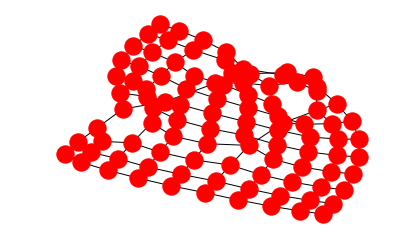

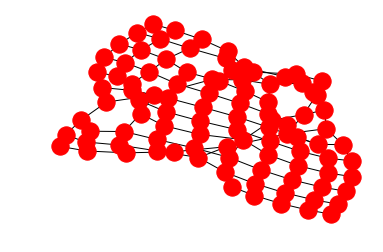

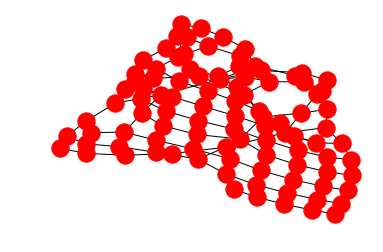

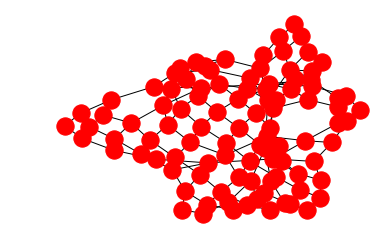

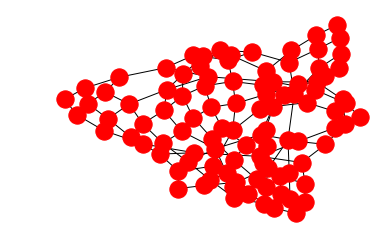

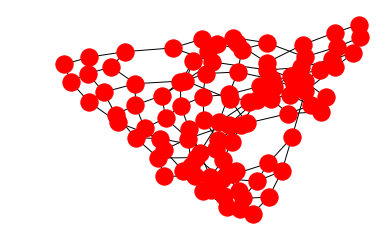

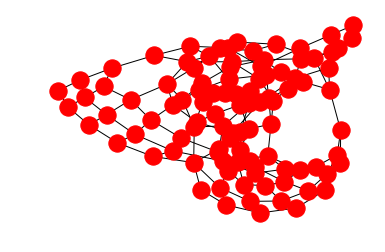

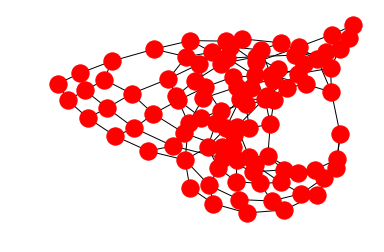

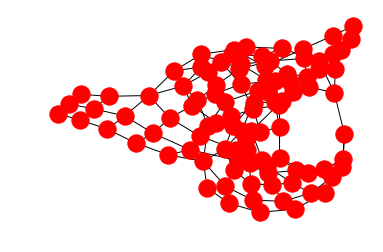

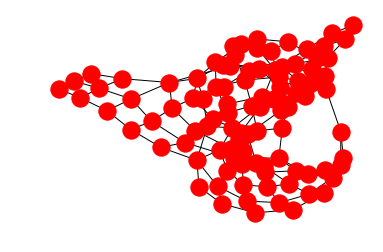

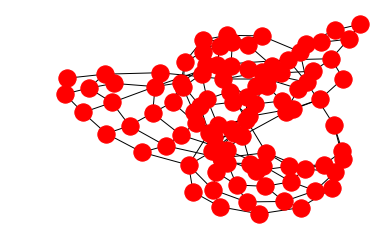

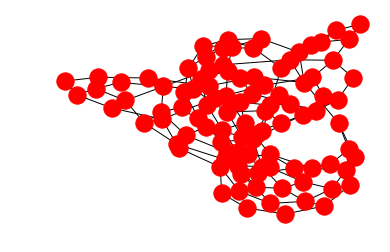

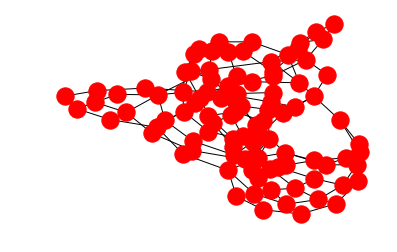

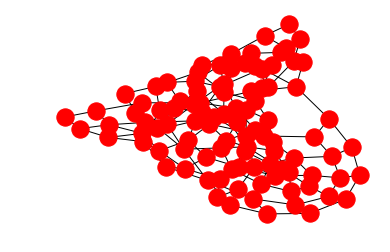

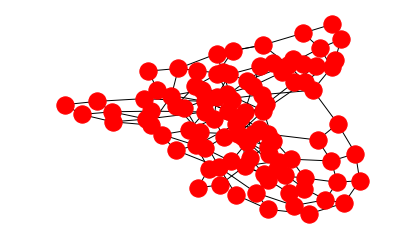

Traceback (most recent call last):
  File "/Users/nico/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/Users/nico/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/Users/nico/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1081, in _start
    self._init_draw()
  File "/Users/nico/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1792, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/Users/nico/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1814, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
TypeError: update() takes 0 positional arguments but 1 was given


In [76]:
initialize()
for _ in range(400):
    update()
    if _%20 == 0:
        observe()
    

#ani = anim.FuncAnimation(fig, update, interval=50, blit=True)

In [43]:
type(nx.draw_networkx(g))

NoneType

In [105]:
m0 = 5 # number of nodes in initial condition
m = 2 # number of edges per new node

def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe(g,h=None,i=None):
    fig, axes = plt.subplots(1,3)
    plt.cla()
    axes[0] = nx.draw(g, pos = g.pos)
    plt.show()

def pref_select(nds):
    global g
    r = np.random.uniform(0, sum(g.degree(i) for i in nds))
    x=0
    for i in nds:
        x += g.degree[i]
        if r <= x:
            return i

def update():
    global g
    g.count += 1
    if g.count % 20 == 0: # network growth once in every 20 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            nds.remove(j)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

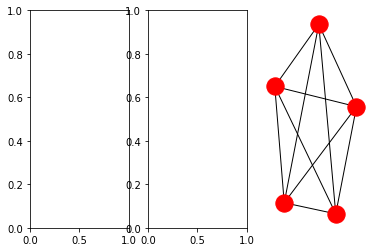

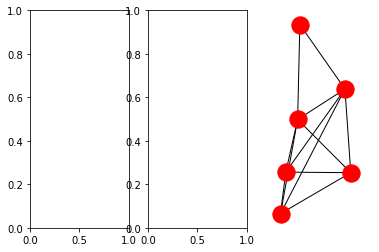

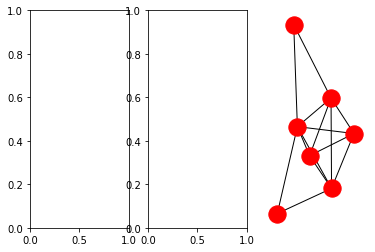

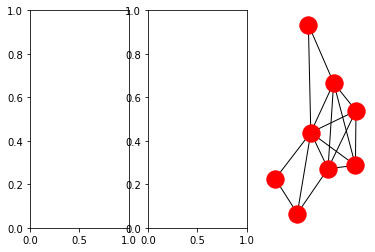

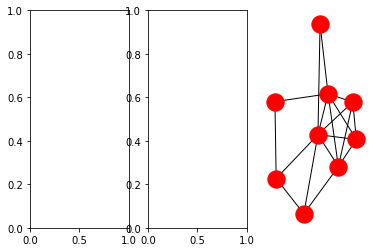

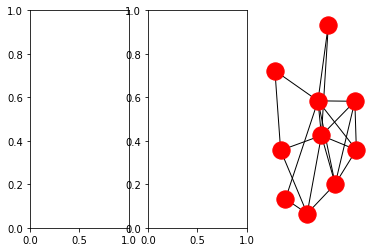

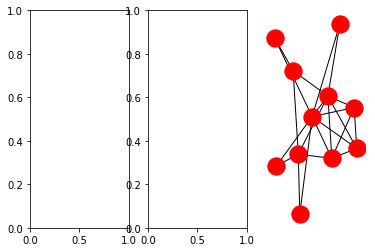

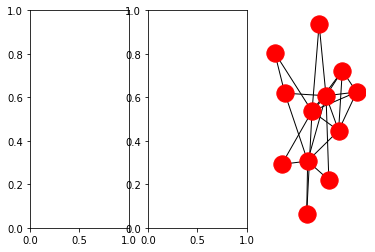

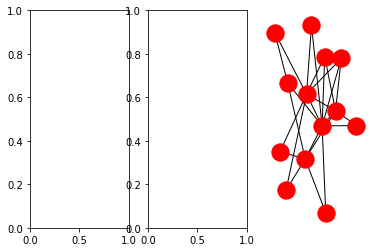

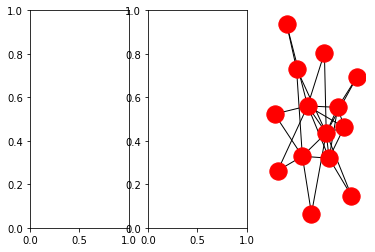

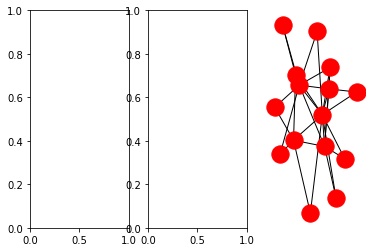

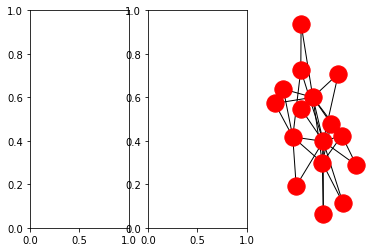

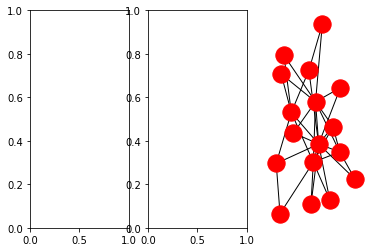

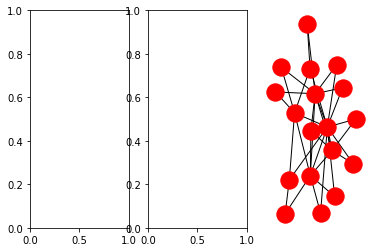

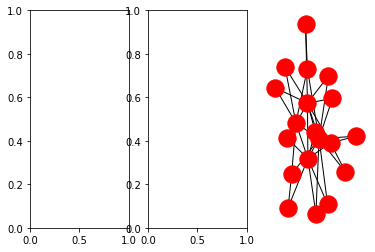

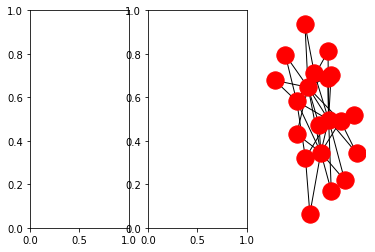

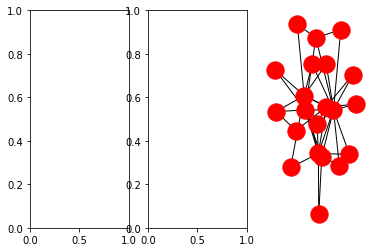

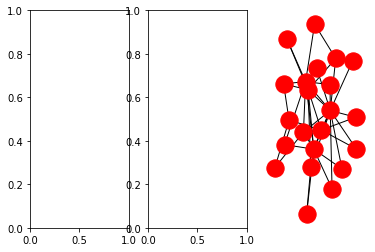

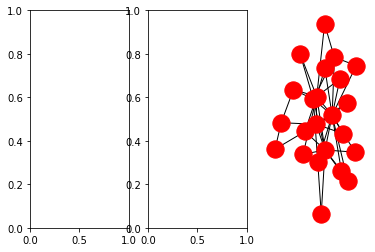

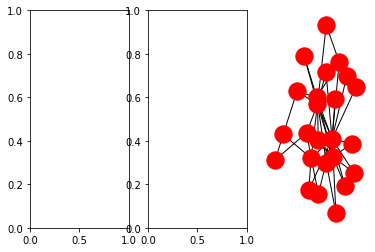

In [106]:
initialize()
for _ in range(400):
    pref_select(g)
    update()
    if _%20 == 0:
        observe(g)

In [97]:
g